In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df=pd.read_csv('/kaggle/input/playground-series-s5e4/train.csv',index_col=0)

In [88]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [89]:
df.shape

(750000, 11)

# Evaluating the data

In [90]:
df['Podcast_Name'].value_counts()

Podcast_Name
Tech Talks             22847
Sports Weekly          20053
Funny Folks            19635
Tech Trends            19549
Fitness First          19488
Business Insights      19480
Style Guide            19364
Game Day               19272
Melody Mix             18889
Criminal Minds         17735
Finance Focus          17628
Detective Diaries      17452
Crime Chronicles       17374
Athlete's Arena        17327
Fashion Forward        17280
Tune Time              17254
Business Briefs        17012
Lifestyle Lounge       16661
True Crime Stories     16373
Sports Central         16191
Digital Digest         16171
Humor Hub              16144
Mystery Matters        16002
Comedy Corner          15927
Joke Junction          15074
Wellness Wave          15009
Sport Spot             14778
Gadget Geek            14770
Home & Living          14686
Laugh Line             14673
Life Lessons           14464
World Watch            14043
Sound Waves            13928
Global News            13649
M

In [91]:
df['Episode_Title'].value_counts()

Episode_Title
Episode 71    10515
Episode 62    10373
Episode 31    10292
Episode 61     9991
Episode 69     9864
              ...  
Episode 2      5134
Episode 25     5117
Episode 41     4965
Episode 37     4940
Episode 95     4838
Name: count, Length: 100, dtype: int64

In [92]:
df['Episode_Length_minutes'].value_counts()

Episode_Length_minutes
6.600000     925
34.400000    617
30.690000    576
31.680000    533
31.460000    491
            ... 
14.498053      1
8.115479       1
93.660301      1
98.298620      1
62.167294      1
Name: count, Length: 12268, dtype: int64

In [93]:
df['Number_of_Ads'].value_counts()

Number_of_Ads
0.00      217592
1.00      214069
3.00      160173
2.00      158156
103.25         2
53.37          1
103.91         1
103.00         1
53.42          1
103.75         1
12.00          1
103.88         1
Name: count, dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 750000 non-null  object 
 1   Episode_Title                750000 non-null  object 
 2   Episode_Length_minutes       662907 non-null  float64
 3   Genre                        750000 non-null  object 
 4   Host_Popularity_percentage   750000 non-null  float64
 5   Publication_Day              750000 non-null  object 
 6   Publication_Time             750000 non-null  object 
 7   Guest_Popularity_percentage  603970 non-null  float64
 8   Number_of_Ads                749999 non-null  float64
 9   Episode_Sentiment            750000 non-null  object 
 10  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), object(6)
memory usage: 68.7+ MB


In [95]:
df.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,64.504738,59.859901,52.236449,1.348855,45.437406
std,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,1.300000,0.000000,0.000000,0.000000
25%,35.730000,39.410000,28.380000,0.000000,23.178350
50%,63.840000,60.050000,53.580000,1.000000,43.379460
75%,94.070000,79.530000,76.600000,2.000000,64.811580
max,325.240000,119.460000,119.910000,103.910000,119.970000


In [96]:
df.columns

Index(['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'Listening_Time_minutes'],
      dtype='object')

# Filling the empty value:

In [97]:
df.isnull().sum()

Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

### 1.Episode_Length_minutes:

In [98]:
df['Episode_Length_minutes'].fillna(value=df['Episode_Length_minutes'].median(), inplace=True)

/tmp/ipykernel_31/1666034736.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Episode_Length_minutes'].fillna(value=df['Episode_Length_minutes'].median(), inplace=True)


### 2.Guest_Poularity_percentage:

In [99]:
df['Guest_Popularity_percentage'].fillna(value=df['Guest_Popularity_percentage'].median(),inplace=True)

/tmp/ipykernel_31/4017981490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Guest_Popularity_percentage'].fillna(value=df['Guest_Popularity_percentage'].median(),inplace=True)


### 3.Number_of_Ads

In [100]:
df['Number_of_Ads'].fillna(value=df['Number_of_Ads'].median(),inplace=True)

/tmp/ipykernel_31/4093153679.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number_of_Ads'].fillna(value=df['Number_of_Ads'].median(),inplace=True)


# Working with Numerical Data:

In [101]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

In [102]:
df_numric=df[numerical_columns]

In [103]:
df_numric.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
id,,,,,
0,63.84,74.81,53.58,0.0,31.41998
1,119.80,66.95,75.95,2.0,88.01241
2,73.90,69.97,8.97,0.0,44.92531
3,67.17,57.22,78.70,2.0,46.27824
4,110.51,80.07,58.68,3.0,75.61031


In [104]:
df_numric.corr()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
Episode_Length_minutes,1.000000,0.022191,-0.008336,-0.051834,0.866221
Host_Popularity_percentage,0.022191,1.000000,0.020416,-0.017895,0.050870
Guest_Popularity_percentage,-0.008336,0.020416,1.000000,0.008173,-0.014446
Number_of_Ads,-0.051834,-0.017895,0.008173,1.000000,-0.118337
Listening_Time_minutes,0.866221,0.050870,-0.014446,-0.118337,1.000000


### Handling the outliers:

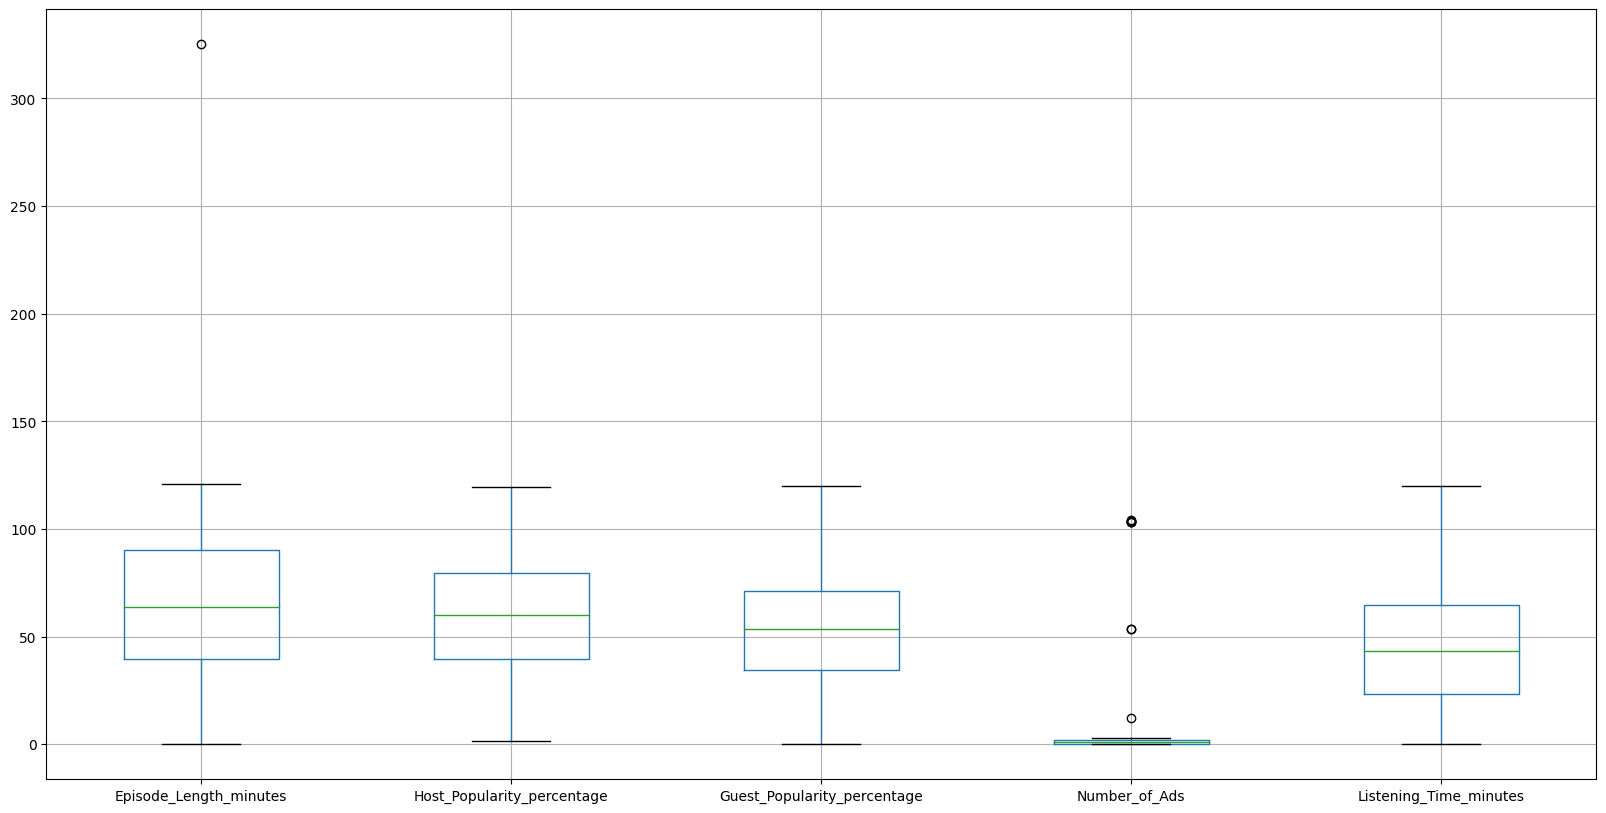

In [105]:
df.boxplot(figsize=(20,10))
plt.show()

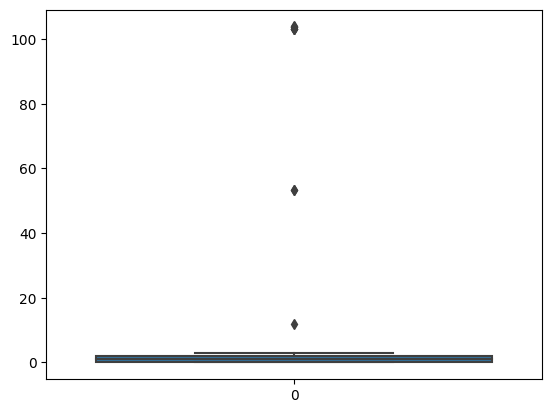

In [106]:
sns.boxplot(df['Number_of_Ads'])
plt.show()

#### Handling Outlier for number_of_ads

In [107]:
q1=df['Number_of_Ads'].quantile(0.25)
q3=df['Number_of_Ads'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(f'lower bound: {lower_bound}')
print(f'upper_bound: {upper_bound}')

lower bound: -3.0
upper_bound: 5.0


In [108]:
outliers=df['Number_of_Ads'][(df['Number_of_Ads']<lower_bound)|(df['Number_of_Ads']>upper_bound)]
print(outliers)

id
211159     53.37
283606    103.91
436577    103.00
495919     53.42
537705    103.75
567235     12.00
602553    103.25
672139    103.25
683147    103.88
Name: Number_of_Ads, dtype: float64


In [109]:
# handling outliers
df['Number_of_Ads']=df['Number_of_Ads'].apply(lambda x:lower_bound if x<lower_bound else (upper_bound if x>upper_bound else x))

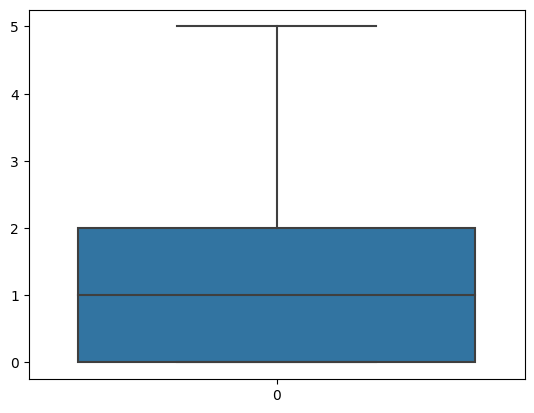

In [110]:
sns.boxplot(df['Number_of_Ads'])
plt.show()

# Distribution of the Numberical-columns:

In [111]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

In [112]:
numerical_columns

['Episode_Length_minutes',
 'Host_Popularity_percentage',
 'Guest_Popularity_percentage',
 'Number_of_Ads',
 'Listening_Time_minutes']

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


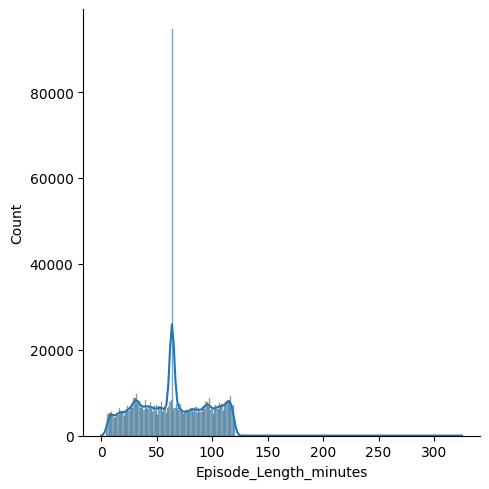

In [113]:
sns.displot(df['Episode_Length_minutes'],kde=True)
plt.show()

#### Episode_Length_minutes:

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


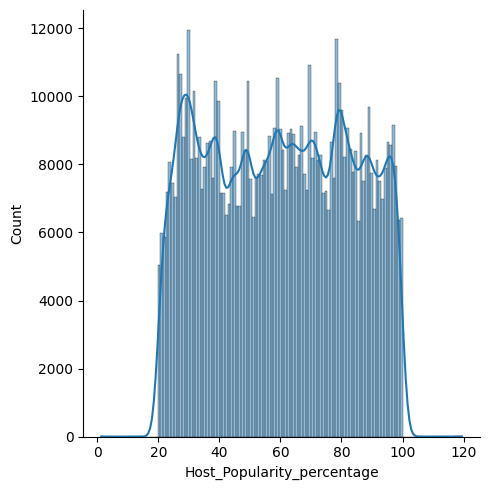

In [114]:
sns.displot(df['Host_Popularity_percentage'],kde=True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


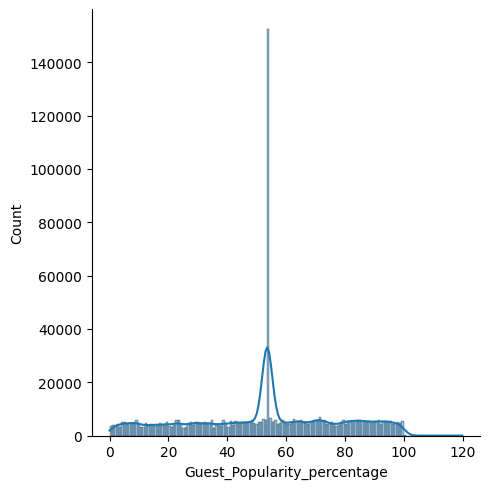

In [115]:
sns.displot(df['Guest_Popularity_percentage'],kde=True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


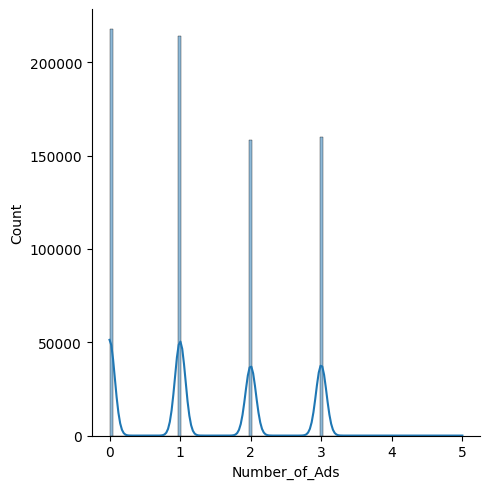

In [116]:
sns.displot(df['Number_of_Ads'],kde=True)
plt.show()

# Working with categorical Coulmn:

In [117]:
df_cat=df.select_dtypes(include=['object']).columns.tolist()
df_cat

['Podcast_Name',
 'Episode_Title',
 'Genre',
 'Publication_Day',
 'Publication_Time',
 'Episode_Sentiment']

In [118]:
categorical_df = df[df_cat]
categorical_df.head()

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
id,,,,,,
0,Mystery Matters,Episode 98,True Crime,Thursday,Night,Positive
1,Joke Junction,Episode 26,Comedy,Saturday,Afternoon,Negative
2,Study Sessions,Episode 16,Education,Tuesday,Evening,Negative
3,Digital Digest,Episode 45,Technology,Monday,Morning,Positive
4,Mind & Body,Episode 86,Health,Monday,Afternoon,Neutral


In [119]:
categorical_df.isnull().sum()

Podcast_Name         0
Episode_Title        0
Genre                0
Publication_Day      0
Publication_Time     0
Episode_Sentiment    0
dtype: int64

In [120]:
categorical_df.describe()

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
count,750000,750000,750000,750000,750000,750000
unique,48,100,10,7,4,3
top,Tech Talks,Episode 71,Sports,Sunday,Night,Neutral
freq,22847,10515,87606,115946,196849,251291


In [121]:
categorical_df.nunique()

Podcast_Name          48
Episode_Title        100
Genre                 10
Publication_Day        7
Publication_Time       4
Episode_Sentiment      3
dtype: int64

In [122]:
categorical_df.shape

(750000, 6)

# Distribution Analysis:

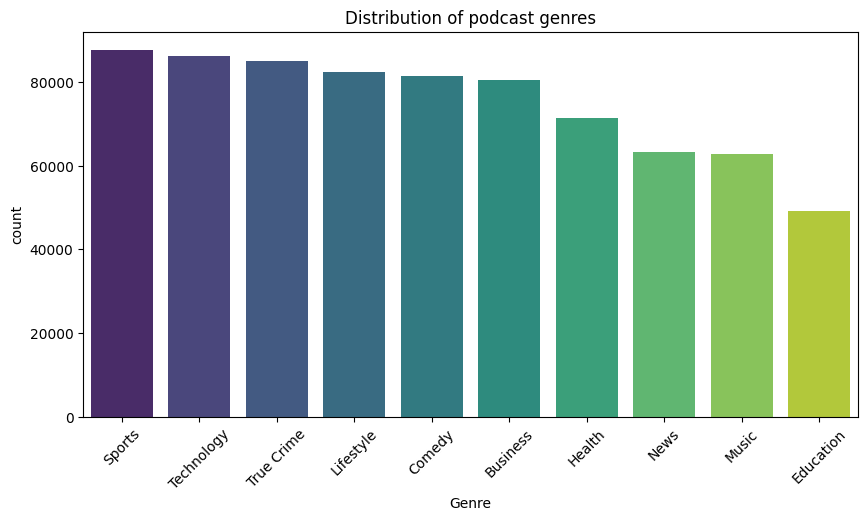

In [123]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of podcast genres')
plt.show()

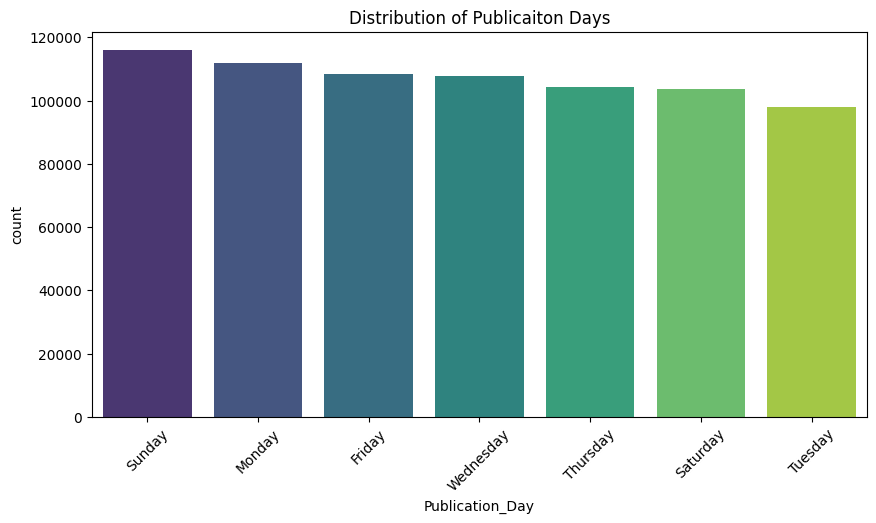

In [124]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Publication_Day',order=df['Publication_Day'].value_counts().index,palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of Publicaiton Days')
plt.show()

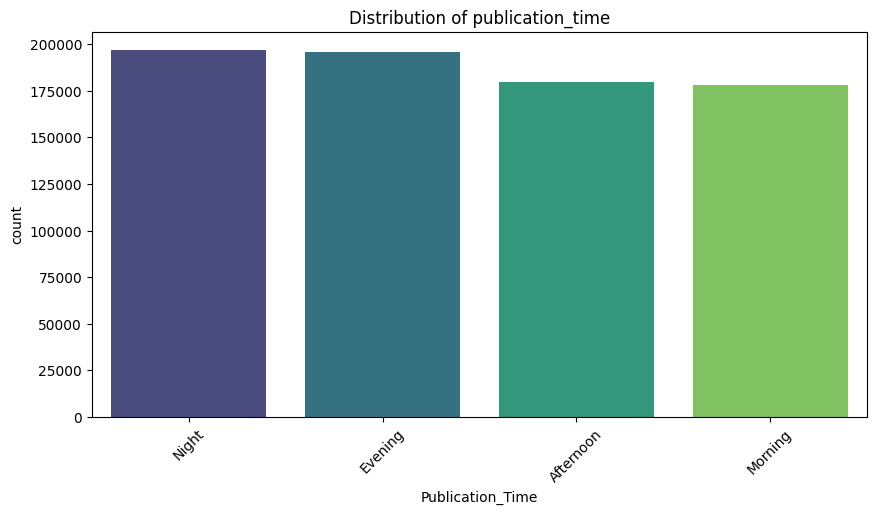

In [125]:
# plot of publication time
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Publication_Time',order=df['Publication_Time'].value_counts().index,palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of publication_time')
plt.show()

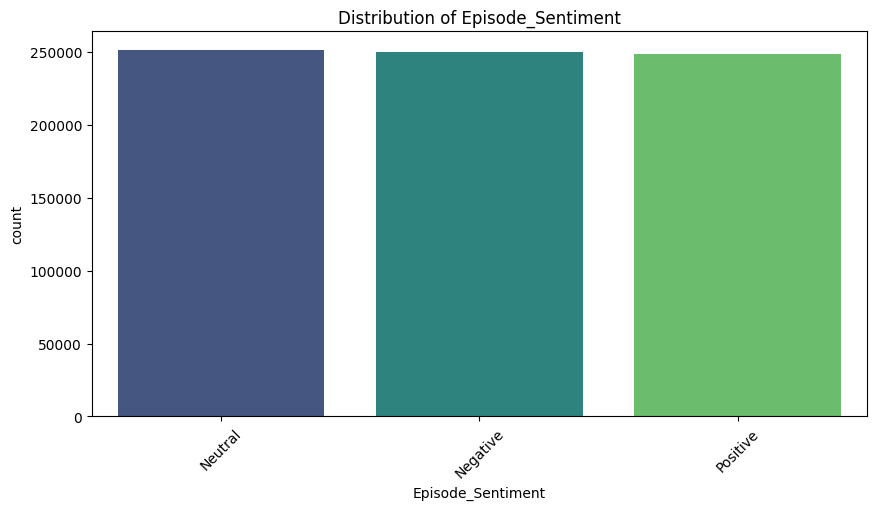

In [126]:
# Plot distribution of Episode_sentiment
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Episode_Sentiment',order=df['Episode_Sentiment'].value_counts().index,palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of Episode_Sentiment')
plt.show()

# Correlation Analysis:

### Encode Categorical Features:

In [127]:
from sklearn.preprocessing import LabelEncoder

In [128]:
label_encoder=LabelEncoder()

In [129]:
df_cat

['Podcast_Name',
 'Episode_Title',
 'Genre',
 'Publication_Day',
 'Publication_Time',
 'Episode_Sentiment']

In [130]:
for column in df_cat:
    df[column]=label_encoder.fit_transform(df[column])

In [131]:
correlation_matrix = df.corr()


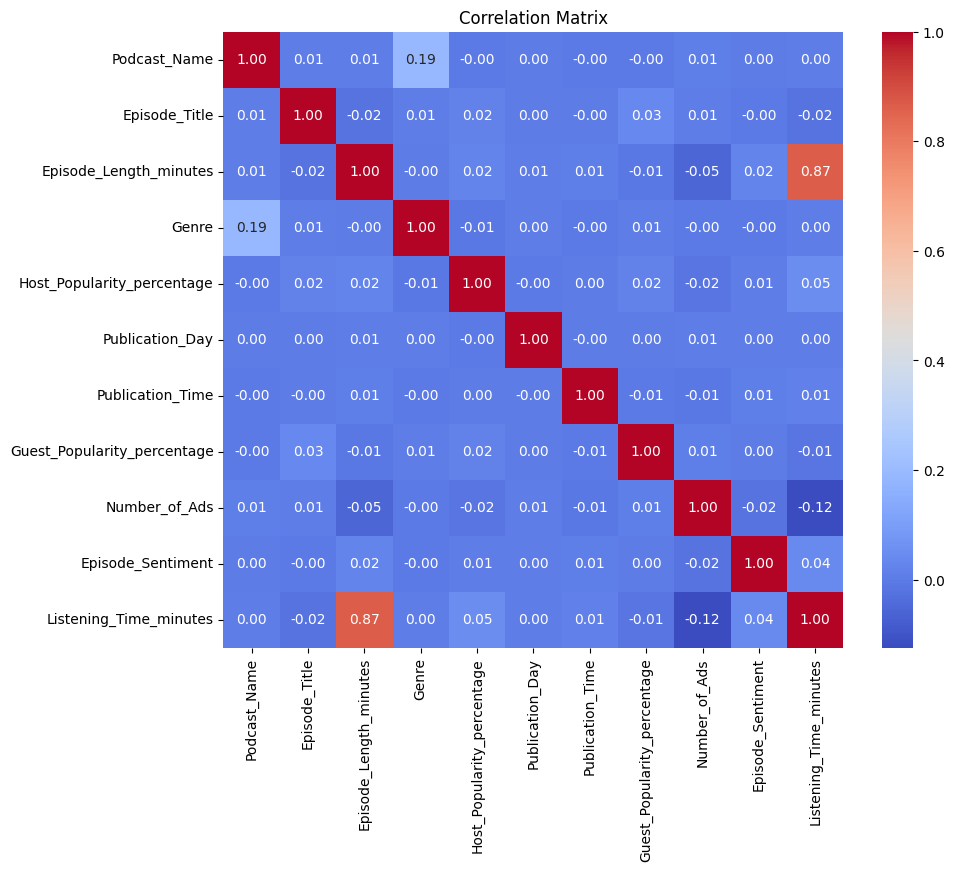

In [132]:

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [133]:
# Focus on correlation with Lisening Time
listening_time_corr=correlation_matrix['Listening_Time_minutes'].sort_values(ascending=False)
print(listening_time_corr)

Listening_Time_minutes         1.000000
Episode_Length_minutes         0.866221
Host_Popularity_percentage     0.050870
Episode_Sentiment              0.039470
Publication_Time               0.013225
Genre                          0.004940
Podcast_Name                   0.004346
Publication_Day                0.004030
Guest_Popularity_percentage   -0.014446
Episode_Title                 -0.020842
Number_of_Ads                 -0.124132
Name: Listening_Time_minutes, dtype: float64


# Dropping the less efective columns:

In [134]:
df_rem=df.drop(columns=['Number_of_Ads','Episode_Title'])

In [135]:
df_rem.head()

,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,
0,34,63.84,9,74.81,4,3,53.58,2,31.41998
1,24,119.80,1,66.95,2,0,75.95,0,88.01241
2,40,73.90,2,69.97,5,1,8.97,0,44.92531
3,10,67.17,8,57.22,1,2,78.70,2,46.27824
4,31,110.51,3,80.07,1,0,58.68,1,75.61031


# Splitting the data in Training and Testing:

In [136]:
x=df_rem.drop([ 'Listening_Time_minutes'],axis=1)
y=df_rem['Listening_Time_minutes']

In [137]:
x.head()

,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Episode_Sentiment
id,,,,,,,,
0,34,63.84,9,74.81,4,3,53.58,2
1,24,119.80,1,66.95,2,0,75.95,0
2,40,73.90,2,69.97,5,1,8.97,0
3,10,67.17,8,57.22,1,2,78.70,2
4,31,110.51,3,80.07,1,0,58.68,1


In [138]:
y.head()

id
0    31.41998
1    88.01241
2    44.92531
3    46.27824
4    75.61031
Name: Listening_Time_minutes, dtype: float64

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [141]:
x_train.head()

,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Episode_Sentiment
id,,,,,,,,
453635,44,94.30,9,97.67,0,0,53.58,2
11651,26,82.15,2,94.78,2,3,53.58,2
431999,43,13.72,8,68.60,2,0,65.77,0
529211,25,24.00,1,42.14,2,2,41.29,0
110925,0,63.84,7,34.10,0,3,53.58,1


In [142]:
x_train.shape

(600000, 8)

In [143]:
x_test.head()

,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Episode_Sentiment
id,,,,,,,,
404846,8,46.59,6,58.43,6,3,81.92,2
580313,24,45.37,1,76.57,6,3,45.79,2
552086,2,54.67,0,96.00,2,0,53.58,2
370876,1,61.76,2,69.57,3,2,17.08,2
239330,22,63.84,1,79.20,2,2,21.31,2


In [144]:
x_test.shape

(150000, 8)

# Scaling the Data:

In [145]:
from sklearn.preprocessing import StandardScaler

In [146]:
ss=StandardScaler()

In [147]:
x_train_transform=ss.fit_transform(x_train)
x_test_transform=ss.transform(x_test)

In [148]:
x_train

,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Episode_Sentiment
id,,,,,,,,
453635,44,94.30,9,97.67,0,0,53.58,2
11651,26,82.15,2,94.78,2,3,53.58,2
431999,43,13.72,8,68.60,2,0,65.77,0
529211,25,24.00,1,42.14,2,2,41.29,0
110925,0,63.84,7,34.10,0,3,53.58,1
...,...,...,...,...,...,...,...,...
259178,5,42.65,9,80.53,0,0,96.31,0
365838,3,94.50,0,42.80,0,0,8.68,2
131932,30,61.54,5,63.97,4,0,62.82,0


# Model_training:

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [150]:
model=LinearRegression()

In [151]:
model.fit(x_train,y_train)

LinearRegression()

In [152]:
y_pred=model.predict(x_test)

In [153]:
mse=mean_squared_error(y_test,y_pred)

In [154]:
mse

181.47232385146555

# RMSE:

In [155]:
from math import sqrt

sqrt(mse)

13.47116638793633

# R2_score

In [156]:
r2=r2_score(y_test,y_pred)

In [157]:
r2

0.7533764852045151

# Random_Forest:

In [158]:
from sklearn.ensemble import  RandomForestRegressor


In [159]:
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)

In [ ]:
rf_model.fit(x_train,y_train)

In [ ]:
y_pred_rf=rf_model.predict(x_test)

In [160]:
y_pred_r

NameError: name 'y_pred_r' is not defined

In [ ]:
mse_rf=mean_squared_error(y_test,y_pred_rf)

In [ ]:
mse_rf

In [ ]:
sqrt(mse_rf)

In [ ]:
r2_score(y_test,y_pred_rf)

In [ ]:
residuals=y_test-y_pred_rf
plt.scatter(y_test,residuals,alpha=0.7,color='blue')
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Actual Listening Time')
plt.ylabel('Residuals')
plt.title('Residual Analysis - Random Forest')
plt.show()

# Training using NN

In [161]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [162]:
model=Sequential()

In [163]:
x_train_transform.shape

(600000, 8)

In [164]:
model.add(Dense(16,activation='relu',input_dim=8))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [165]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 977 (3.82 KB)

 Trainable params: 977 (3.82 KB)

 Non-trainable params: 0 (0.00 B)

In [166]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [167]:
model.fit(x_train_transform,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 327.5796 - val_loss: 182.8286
Epoch 2/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 184.7016 - val_loss: 181.8734
Epoch 3/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 183.6354 - val_loss: 182.4991
Epoch 4/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 182.4338 - val_loss: 181.5040
Epoch 5/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 182.7719 - val_loss: 182.0107
Epoch 6/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 182.7182 - val_loss: 181.7592
Epoch 7/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 183.2424 - val_loss: 181.7879
Epoch 8/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 182.1354 - val_loss: 181.3907
Epoch 9/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 182.4008 - val_loss: 181.7230
Epoch 10/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 182.3512 - val_loss: 181.5262


In [171]:

y_pred_nn=model.predict(x_test)
mse_nn=mean_squared_error(y_test,y_pred)



4688/4688 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


In [172]:
sqrt(mse_nn)

13.47116638793633

# Gredient Boosting:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,max_depth=5,random_state=42)


In [ ]:
gb_model.fit(x_train_transform,y_train)

In [ ]:
y_test=gb_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test, y_pred_gb)
print(mse)

In [ ]:
sqrt(mse)

# Test_data:

In [ ]:
df_test=pd.read_csv('/kaggle/input/playground-series-s5e4/test.csv',index_col=0)

In [ ]:
df_test.head()

# exploring the test_data:

In [ ]:
df_test.shape

In [ ]:
df_test.isnull().sum()

In [ ]:
df_test.info()

### filling the missing_values:

In [ ]:
df_test['Episode_Length_minutes'].fillna(value=df_test['Episode_Length_minutes'].median(),inplace=True)

In [ ]:
df_test['Guest_Popularity_percentage'].fillna(value=df_test['Guest_Popularity_percentage'].median(),inplace=True)

In [ ]:
df_test.info()

In [ ]:
df_test.boxplot(figsize=(20,10))
plt.show()

# Handling the Outlier:

In [ ]:
q1=df_test['Episode_Length_minutes'].quantile(0.25)
q3=df_test['Episode_Length_minutes'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(f'lower bound: {lower_bound}')
print(f'upper_bound: {upper_bound}')


In [ ]:
outliers=df_test['Episode_Length_minutes'][(df_test['Episode_Length_minutes']<lower_bound)|(df_test['Episode_Length_minutes']>upper_bound)]
print(outliers)

In [ ]:
# Handling the outlier
df_test['Episode_Length_minutes']=df_test['Episode_Length_minutes'].apply(lambda x:lower_bound if x<lower_bound else (upper_bound if x>upper_bound else x))

In [ ]:
sns.boxplot(df_test['Episode_Length_minutes'])
plt.show()

In [ ]:
# handling the outlier of Number_of_Ads
q1=df_test['Number_of_Ads'].quantile(0.25)
q3=df_test['Number_of_Ads'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(f'lower bound: {lower_bound}')
print(f'upper_bound: {upper_bound}')


In [ ]:
outliers=df_test['Number_of_Ads'][(df_test['Number_of_Ads']<lower_bound)|(df_test['Number_of_Ads']>upper_bound)]
print(outliers)

In [ ]:
df_test['Number_of_Ads']=df_test['Number_of_Ads'].apply(lambda x:lower_bound if x<lower_bound else (upper_bound if x>upper_bound else x))

In [ ]:
sns.boxplot(df_test['Number_of_Ads'])
plt.show()


# Distribution of Numerical Column:

In [ ]:
numerical_columns=df_test.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
numerical_columns

In [ ]:
sns.displot(df_test['Episode_Length_minutes'],kde=True)
plt.show()

In [ ]:
sns.displot(df_test['Host_Popularity_percentage'],kde=True)
plt.show()

In [ ]:
sns.displot(df_test['Guest_Popularity_percentage'],kde=True)
plt.show()

In [ ]:
sns.displot(df_test['Number_of_Ads'],kde=True)
plt.show()

In [ ]:
sns.displot(df_test['Episode_Length_minutes'],kde=True)
plt.show()

# Working with categorical columns:

In [ ]:
df_test_cat=df_test.select_dtypes(include=['object']).columns.tolist()
df_test_cat

In [ ]:
categorical_df_test=df_test[df_test_cat]
categorical_df_test.head()

In [ ]:
categorical_df_test.isnull().sum()

In [ ]:
categorical_df_test.describe()

In [ ]:
categorical_df_test.nunique()

In [ ]:
categorical_df_test.shape

# Distribution Analysis:

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=categorical_df_test, x='Genre', order=categorical_df_test['Genre'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of podcast genres')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=categorical_df_test,x='Publication_Day',order=categorical_df_test['Publication_Day'].value_counts().index,palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of Publicaiton Days')

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=categorical_df_test,x='Publication_Time',order=categorical_df_test['Publication_Time'].value_counts().index,palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of publication_time')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=categorical_df_test,x='Episode_Sentiment',order=categorical_df_test['Episode_Sentiment'].value_counts().index,palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of Episode_Sentiment')
plt.show()

# Encode the Categorical Features:

In [ ]:
for column in df_test_cat:
    df_test[column]=label_encoder.fit_transform(df_test[column])

In [ ]:
df_test.head()

# Scaling the test_data:

In [ ]:

df_test_scaled=ss.transform(df_test)

# prediction:

In [ ]:
df_test_pred=rf_model.predict(df_test_scaled)

In [ ]:
df_test_pred

In [ ]:
submission_rf=pd.DataFrame({id:df_test.index,'Listening_Time_minutes':df_test_pred})

In [ ]:
submission_rf.head()

In [ ]:
submission_rf.to_csv('submission_rf+1.csv',index=False)